# Chargement des données

Dans mon projet, j'ai choisi de classifier des images associées à 5 labels différents : **vintage**, **classique**, **gothique**, **streetwear** et **chic**.

J'ai réparti mes images dans 3 ensembles (et donc 3 dossiers): *train*, *validation* et *test*. Chacun de ces dossiers comporte un sous-dossier par classe, qui contient les images correspondantes. L'arborescence est résumée sur l'image ci-dessus.

J'ai choisi d'héberger ma base de données sur Github : l'intérêt est qu'un **git clone** depuis Google Colab est très rapide, ce qui vous garantit une certaine simplicité. Je vous encourage à en faire de même.

In [1]:
!git clone https://github.com/TItygrosminet/Projet_Deep_Learning.git
path = "./Projet_Deep_Learning/src/donnees/"

Cloning into 'Projet_Deep_Learning'...
remote: Enumerating objects: 4944, done.
remote: Counting objects: 100% (4944/4944), done.
remote: Compressing objects: 100% (4864/4864), done.
remote: Total 4944 (delta 76), reused 4940 (delta 72), pack-reused 0
Receiving objects: 100% (4944/4944), 280.13 MiB | 28.05 MiB/s, done.
Resolving deltas: 100% (76/76), done.
Updating files: 100% (5259/5259), done.


Une fois les données téléchargées localement, on peut maintenant charger les images et les labels. Si vous avez construit votre arborescence de la même manière que la mienne, et que vous adaptez les noms de labels à votre projet, alors le code suivant devrait être utilisable directement.

In [2]:
import cv2

# Fonction pour rogner la personne
def crop(image):
    # Initialisation du HOG descriptor
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

    # Detection d'une personne sur l'image
    (humans, _) = hog.detectMultiScale(image, winStride=(10, 10), padding=(32, 32), scale=1.1)

    if len(humans) == 0:
        return image, False

    # Rogne le corps
    (x, y, w, h) = humans[0]
    pad_w, pad_h = int(0.15 * w), int(0.01 * h)
    crop_x = x + pad_w
    crop_y = y + pad_h
    crop_w = w - 2 * pad_w
    crop_h = h - 2 * pad_h

    if crop_w <= 0 or crop_h <= 0:
        return image, False
    else:
        image = image[crop_y:crop_y+crop_h, crop_x:crop_x+crop_w]

    return image, True


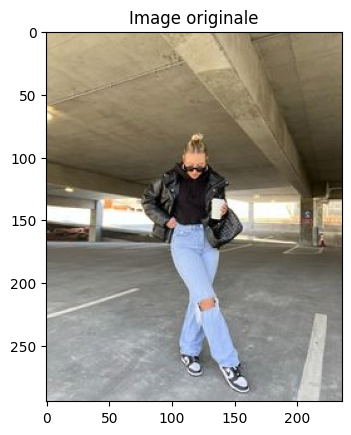

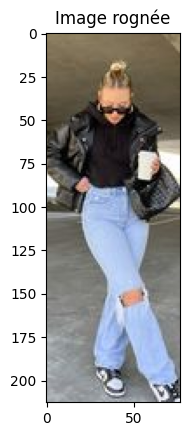

In [3]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread("./Projet_Deep_Learning/src/donnees/test/streetwear/streetwear (760).jpg")

# Appliquer la fonction crop
image_cropped, cropped = crop(image)

if not cropped:
  print("No person detected")

# Afficher l'image originale
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Image originale")
plt.show()

# Afficher l'image rognée
plt.imshow(cv2.cvtColor(image_cropped, cv2.COLOR_BGR2RGB))
plt.title("Image rognée")
plt.show()


In [6]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat

import cv2


def load_data(data_path, classes, dataset='train', image_size=64):

    num_images = 0
    num_cropped = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)
    
        # Chargement des images, 
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = cv2.imread(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # # Rogne l'image pour garder uniquement le corps
                # cropped_img, cropped = crop(img)
                # # Si l'image a été rognée, on incrémente num_cropped
                # if cropped:
                #   num_cropped += 1
                # Conversion de l'image en RGB
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = cv2.resize(img, (image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y

Voici ensuite un exemple de chargement de vos données. Notez que vous pouvez modifier la dimension des images, ce qui sera utile à différents stades de votre projet.

In [8]:
num_cropped = 0;

labels = ['vintage', 'classique', 'gothique', 'streetwear', 'chic']

x_train, y_train = load_data(path, labels, dataset='train', image_size=64)
# num_cropped += cropped
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='validation', image_size=64)
# num_cropped += cropped
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size=64)
# num_cropped += cropped
print(x_test.shape, y_test.shape)

print(num_cropped)

(3008, 64, 64, 3) (3008, 1)
(617, 64, 64, 3) (617, 1)
(608, 64, 64, 3) (608, 1)
0


Vous pouvez utiliser le bloc suivant pour afficher quelques-unes de vos images, et ainsi vérifier que tout s'est bien passé.

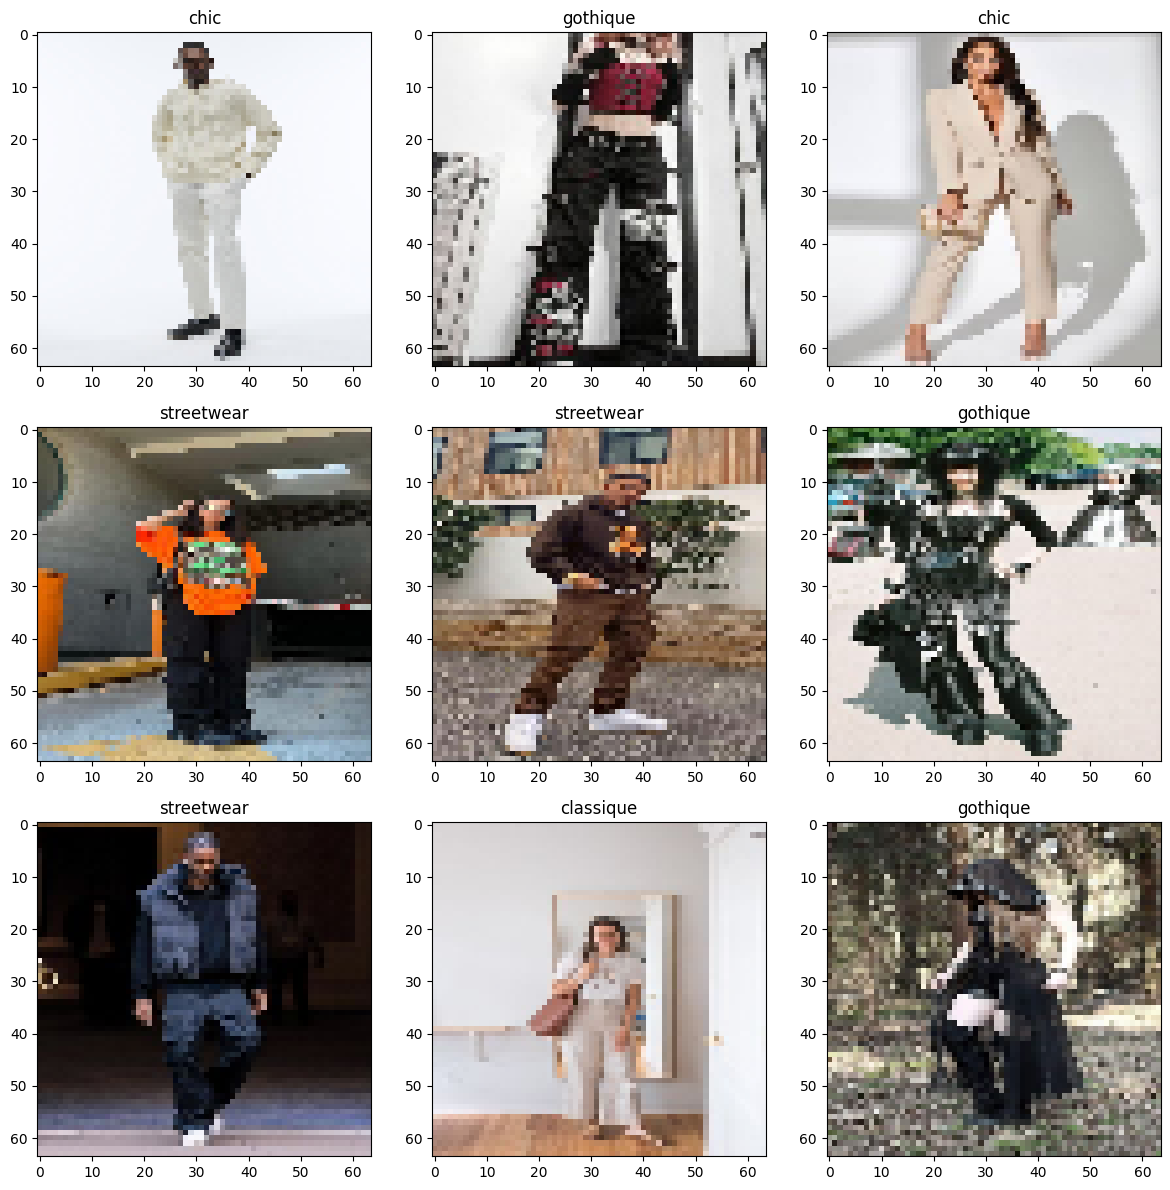

In [9]:
import matplotlib.pyplot as plt
from random import randint
plt.figure(figsize=(12, 12))
shuffle_indices = [randint(0, x_val.shape[0]) for i in range(9)]
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_val[shuffle_indices[i]]
    plt.title(labels[int(y_val[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

image_size=64
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',input_shape=[image_size,image_size,3]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(96, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  
model.add(Dense(512, activation='relu'))   # Couche dense, à 512 neurones
model.add(Dense(5, activation='softmax'))   # Couche de sortie


In [11]:
from tensorflow.keras import optimizers
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train/255, y_train, validation_data=(x_val/255, y_val), epochs=10, batch_size=10)

Epoch 1/10
301/301 [==============================] - 15s 7ms/step - loss: 1.4697 - accuracy: 0.3537 - val_loss: 1.3447 - val_accuracy: 0.4149
Epoch 2/10
301/301 [==============================] - 2s 6ms/step - loss: 1.2535 - accuracy: 0.4824 - val_loss: 1.2606 - val_accuracy: 0.4846
Epoch 3/10
301/301 [==============================] - 1s 5ms/step - loss: 1.1206 - accuracy: 0.5532 - val_loss: 1.3087 - val_accuracy: 0.4263
Epoch 4/10
301/301 [==============================] - 1s 5ms/step - loss: 0.9865 - accuracy: 0.6100 - val_loss: 1.2150 - val_accuracy: 0.5057
Epoch 5/10
301/301 [==============================] - 2s 6ms/step - loss: 0.8939 - accuracy: 0.6536 - val_loss: 1.1849 - val_accuracy: 0.5089
Epoch 6/10
301/301 [==============================] - 2s 7ms/step - loss: 0.7733 - accuracy: 0.7001 - val_loss: 1.1490 - val_accuracy: 0.5170
Epoch 7/10
301/301 [==============================] - 2s 5ms/step - loss: 0.6888 - accuracy: 0.7350 - val_loss: 1.2018 - val_accuracy: 0.5154
Epoch

In [13]:
def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

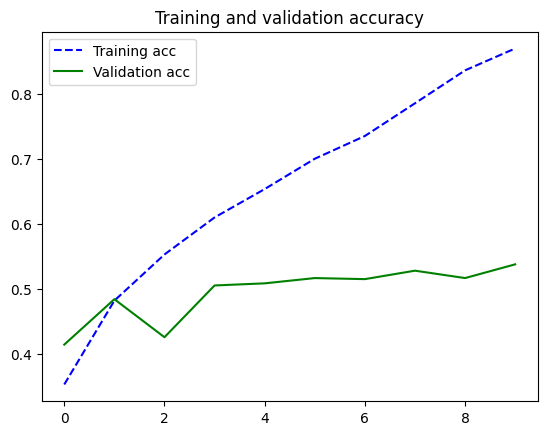

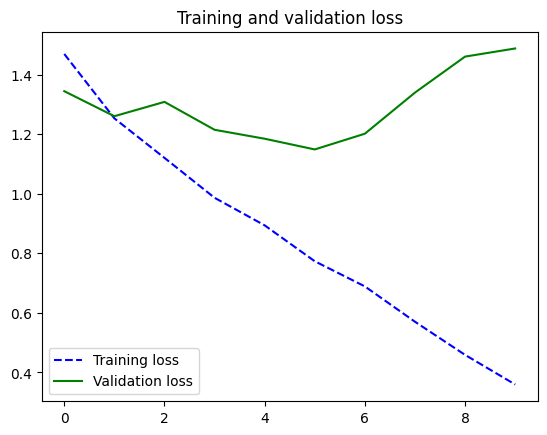

In [14]:
plot_training_analysis()